In [41]:
import numpy as np
import pandas as pd

df = pd.read_csv('/content/synthetic_water_quality_dataset_class.csv')

df.head(5)

,pH,Turbidity,Temperature,TDS,WQI_Class
0,6.998160,10.058762,39.101117,372.828701,Medium
1,9.302857,4.003170,5.601055,898.125006,Avg
2,8.427976,23.722659,38.167808,1281.423258,Avg
3,7.894634,0.498462,17.903710,801.536081,Medium
4,6.124075,4.238308,5.353164,747.319075,Medium


In [42]:
from sklearn.preprocessing import LabelEncoder, StandardScaler,OneHotEncoder

df['WQI_Class'] = LabelEncoder().fit_transform(df['WQI_Class'])

In [43]:
df[['pH','Turbidity','Temperature','TDS']] = StandardScaler().fit_transform(df[['pH','Turbidity','Temperature','TDS']])

In [44]:
df.head(5)

,pH,Turbidity,Temperature,TDS,WQI_Class
0,-0.422914,-1.024909,1.621296,-1.189358,3
1,1.568495,-1.446794,-1.686990,-0.252003,0
2,0.812540,-0.072962,1.529127,0.431966,0
3,0.351698,-1.690963,-0.472046,-0.424360,3
4,-1.178182,-1.430412,-1.711471,-0.521106,3


In [70]:
from sklearn.model_selection import train_test_split
X = df[['pH','Turbidity','Temperature','TDS']]
y = df['WQI_Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=5)
y_test = to_categorical(y_test, num_classes=5)

X_train shape: (5200, 4)
X_test shape: (1300, 4)
y_train shape: (5200,)
y_test shape: (1300,)


In [73]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

input_dim = X_train.shape[1]
output_classes = y_train.shape[1]
model = Sequential()
model.add(Input(shape=(input_dim,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='gelu'))
model.add(Dense(output_classes, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_39 (Dense)                │ (None, 128)            │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,221 (36.02 KB)

 Trainable params: 9,221 (36.02 KB)

 Non-trainable params: 0 (0.00 B)

In [74]:
history = model.fit(X_train, y_train, epochs=1000, batch_size=128, validation_split=0.2)

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

Epoch 1/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.4471 - loss: 1.3966 - val_accuracy: 0.6433 - val_loss: 0.9719
Epoch 2/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5895 - loss: 1.0028 - val_accuracy: 0.6846 - val_loss: 0.8394
Epoch 3/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6445 - loss: 0.8874 - val_accuracy: 0.7067 - val_loss: 0.7591
Epoch 4/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6642 - loss: 0.8056 - val_accuracy: 0.7423 - val_loss: 0.6828
Epoch 5/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7096 - loss: 0.7203 - val_accuracy: 0.7606 - val_loss: 0.6233
Epoch 6/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7316 - loss: 0.6484 - val_accuracy: 0.7856 - val_loss: 0.5720
Epoch 7/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7543 - loss: 0.6015 - val_accuracy: 0.8135 - val_loss: 0.5158
Epoch 8/1000
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7935 - loss: 0.5375 - val_accuracy: 0

In [63]:
y_pred = model.predict(X_test)

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [64]:
y_pred

array([[5.9684026e-03, 6.4754939e-09, 2.9464668e-16, 5.9610200e-10,
        9.9403155e-01],
       [8.1237141e-09, 1.7448247e-12, 8.1406379e-01, 1.8593623e-01,
        7.3260923e-30],
       [9.7774416e-01, 7.5669258e-17, 4.0307208e-26, 6.3064808e-06,
        2.2249490e-02],
       ...,
       [5.5404143e-07, 8.2832462e-01, 3.3649883e-24, 2.4713268e-15,
        1.7167483e-01],
       [7.6056242e-01, 1.3732560e-22, 8.1999874e-09, 2.3943755e-01,
        4.8618520e-10],
       [9.6627343e-01, 5.2729765e-22, 3.4622023e-25, 5.2573294e-15,
        3.3726610e-02]], dtype=float32)

In [65]:
from sklearn.metrics import accuracy_score
import numpy as np

y_pred_classes = np.argmax(y_pred, axis=1)
accuracy = accuracy_score(y_test, y_pred_classes)
print(f'Test Accuracy: {accuracy:.4f}')

Test Accuracy: 0.8469


In [66]:
#Test Accuracy: 0.8562 from relu
# Test Accuracy: 0.7869 from sigmoid
# Test Accuracy: 0.8638 from relu-sigmoid

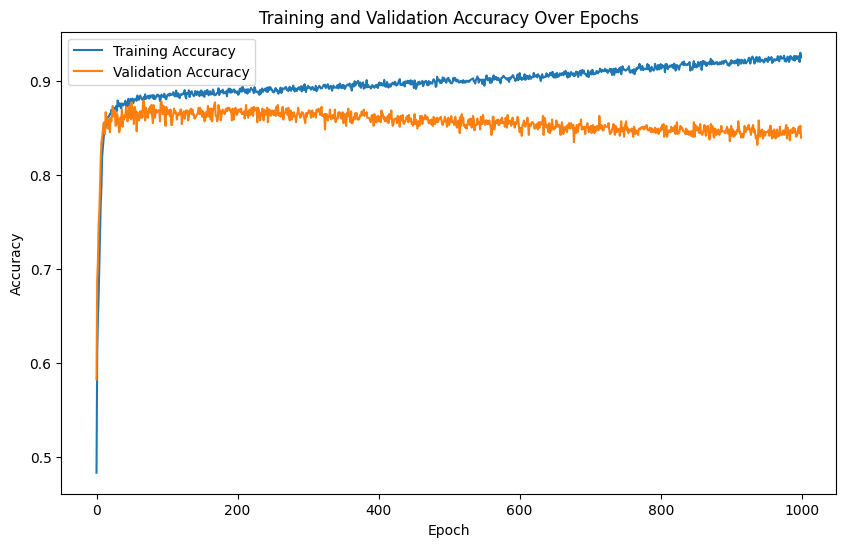

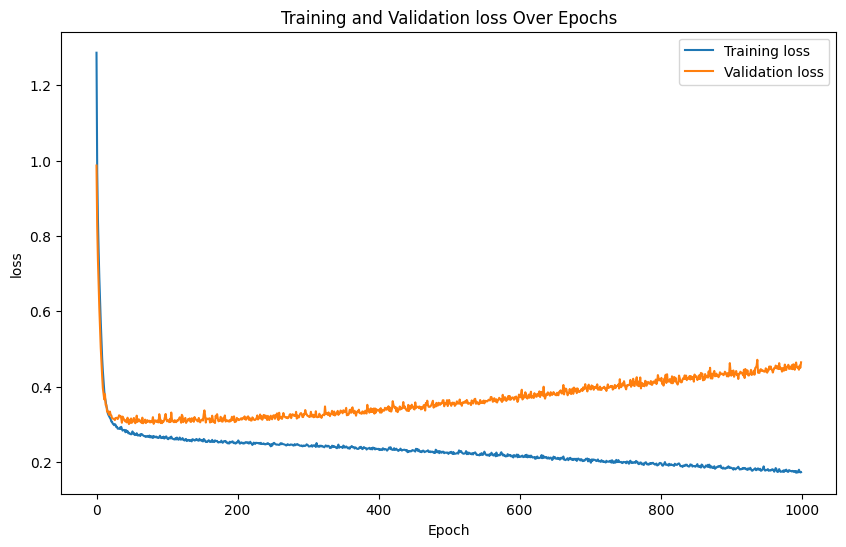

In [67]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Training and Validation loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [75]:
import joblib

# Save trained ANN model
joblib.dump(model, "wqi_ann_model.joblib")

print("✅ Model saved using joblib")


✅ Model saved using joblib
